In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statistics as st

In [2]:
diabetes_data = "C:/Users/ICT/Desktop/OneCampus Python book/diabetes_null.csv"

In [3]:
df = pd.read_csv(diabetes_data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,5,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,4.0,35.0,168.0,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
# using describe to check the statistical distribution of the data to determine whether to use the mean or median value for replace missing values

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.00000,3.0000,6.0000,17.00
Glucose,763.0,99.310616,55.115381,1.0,72.50000,113.0000,138.0000,199.00
BloodPressure,733.0,55.706685,29.878852,1.0,16.00000,66.0000,76.0000,122.00
SkinThickness,541.0,25.876155,12.967816,1.0,18.00000,27.0000,35.0000,99.00
Insulin,394.0,105.659898,116.862508,1.0,21.00000,71.0000,151.0000,846.00
BMI,757.0,29.865654,10.686049,2.0,25.40000,32.0000,36.1000,67.10
DiabetesPedigreeFunction,768.0,0.490439,0.346050,0.1,0.25375,0.3825,0.6475,2.42
Age,768.0,30.990885,13.281475,3.0,23.00000,28.0000,38.2500,81.00
Outcome,768.0,0.348958,0.476951,0.0,0.00000,0.0000,1.0000,1.00


In [8]:
# getting the mean and median of columns with missing values
GlucoseMean = df['Glucose'].mean()
GlucoseMean

99.31061598951507

In [9]:
GlucoseMedian = df['Glucose'].median()
GlucoseMedian

113.0

In [10]:
BloodPressureMean = df['BloodPressure'].mean()
BloodPressureMean

55.70668485675307

In [11]:
BloodPressureMedian = df['BloodPressure'].median()
BloodPressureMedian

66.0

In [12]:
SkinThicknessMean = df['SkinThickness'].mean()
SkinThicknessMean

25.87615526802218

In [13]:
SkinThicknessMedian = df['SkinThickness'].median()
SkinThicknessMedian

27.0

In [14]:
InsulinMean = df['Insulin'].mean()
InsulinMean

105.65989847715736

In [15]:
InsulinMedian = df['Insulin'].median()
InsulinMedian

71.0

In [16]:
BMI_mean = df['BMI'].mean()
BMI_mean

29.86565389696167

In [17]:
BMI_median = df['BMI'].median()
BMI_median

32.0

In [18]:
# As the mean and median are not the same values, I will go ahead and use the median value to fill for each columns with missing values

In [19]:
df['BMI'] = df['BMI'].fillna(BMI_median)

In [20]:
df['Insulin'] = df['Insulin'].fillna(InsulinMedian)

In [21]:
df['SkinThickness'] = df['SkinThickness'].fillna(SkinThicknessMedian)
df['BloodPressure'] = df['BloodPressure'].fillna(BloodPressureMedian)
df['Glucose'] = df['Glucose'].fillna(GlucoseMedian)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [23]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
# checking for duplicated rows
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [25]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.070923,0.072339,0.058460,-0.000439,-0.010579,-0.049491,0.405498,0.221898
Glucose,0.070923,1.000000,0.006651,0.142428,0.211607,0.074019,0.042623,0.074340,0.308293
BloodPressure,0.072339,0.006651,1.000000,-0.004826,-0.048204,-0.016402,0.011867,0.054138,0.027355
SkinThickness,0.058460,0.142428,-0.004826,1.000000,0.097197,0.203945,0.097244,0.077722,0.209081
Insulin,-0.000439,0.211607,-0.048204,0.097197,1.000000,-0.047124,0.155648,-0.002200,0.136140
BMI,-0.010579,0.074019,-0.016402,0.203945,-0.047124,1.000000,0.041878,0.023160,0.183921
DiabetesPedigreeFunction,-0.049491,0.042623,0.011867,0.097244,0.155648,0.041878,1.000000,0.065132,0.151608
Age,0.405498,0.074340,0.054138,0.077722,-0.002200,0.023160,0.065132,1.000000,0.175860
Outcome,0.221898,0.308293,0.027355,0.209081,0.136140,0.183921,0.151608,0.175860,1.000000


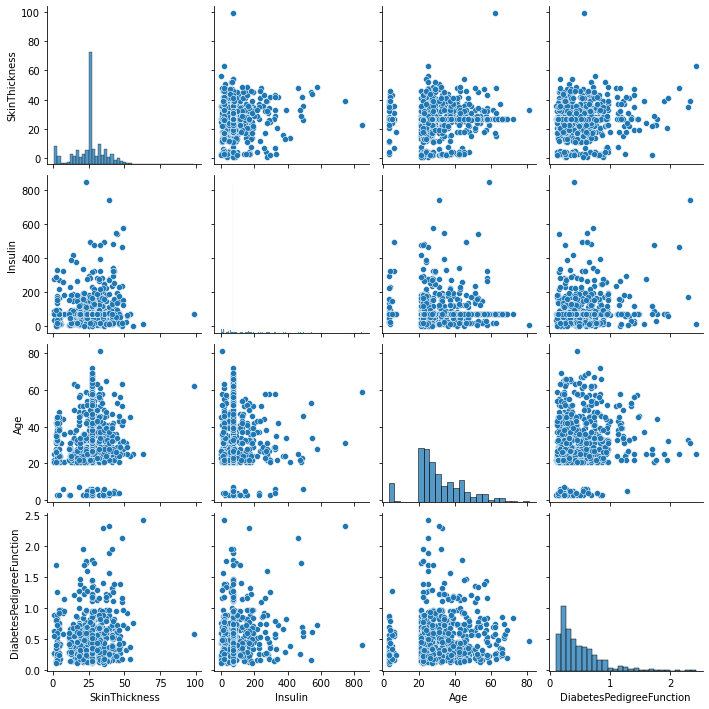

In [26]:
# using pairplot to visually inspect the corralation matrix between the features
sb.pairplot(df[['SkinThickness', 'Insulin', 'Age', 'DiabetesPedigreeFunction']])

<AxesSubplot:xlabel='SkinThickness', ylabel='DiabetesPedigreeFunction'>

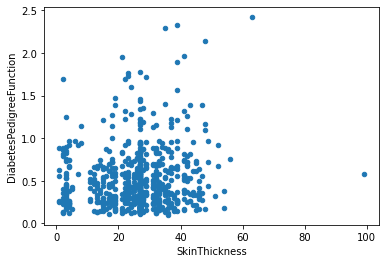

In [27]:
# using scatter plot to identify outlier
df.plot.scatter(x='SkinThickness', y='DiabetesPedigreeFunction')

In [28]:
df.loc[(df['SkinThickness']>80) & (df['DiabetesPedigreeFunction']<0.8)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197.0,7.0,99.0,71.0,34.7,0.575,62,1


In [29]:
# removing the outlier in skinthickness feature with respect to pedigreefunction
df = df.drop(579)

<AxesSubplot:xlabel='SkinThickness', ylabel='DiabetesPedigreeFunction'>

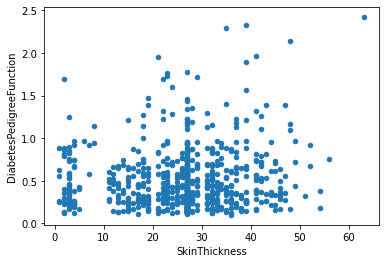

In [30]:
df.plot.scatter(x='SkinThickness', y='DiabetesPedigreeFunction')

In [31]:
df.loc[(df['SkinThickness']>60)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,18.0,78.0,63.0,14.0,59.4,2.42,25,1


In [32]:
df = df.drop(445)

<AxesSubplot:xlabel='SkinThickness', ylabel='DiabetesPedigreeFunction'>

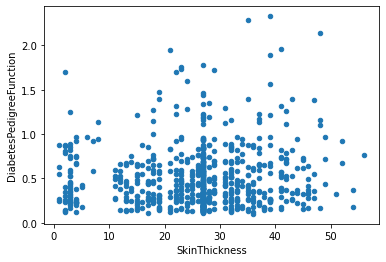

In [33]:
# outlier successfully removed using scatter plot
df.plot.scatter(x='SkinThickness', y='DiabetesPedigreeFunction')

<AxesSubplot:xlabel='Insulin', ylabel='DiabetesPedigreeFunction'>

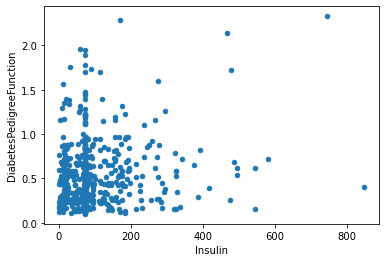

In [34]:
# identifying outlier in insulin features with respect to diabetespedigreefunction
df.plot.scatter(x='Insulin', y='DiabetesPedigreeFunction')

In [35]:
df.loc[(df['Insulin']> 700) & (df['DiabetesPedigreeFunction']> 0.25)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189.0,6.0,23.0,846.0,3.1,0.398,59,1
228,4,197.0,7.0,39.0,744.0,36.7,2.329,31,0


In [36]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
363,4,146.0,78.0,27.0,71.0,38.5,0.520,67,1
395,2,127.0,58.0,24.0,275.0,27.7,1.600,25,0
189,5,139.0,8.0,35.0,16.0,31.6,0.361,25,1
209,7,184.0,84.0,33.0,71.0,35.5,0.355,41,1
183,5,73.0,6.0,27.0,71.0,26.8,0.268,27,0


In [37]:
# removing the detected outiers
df = df.drop([13, 228])

<AxesSubplot:xlabel='Insulin', ylabel='DiabetesPedigreeFunction'>

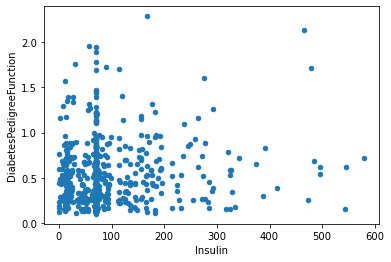

In [38]:
df.plot.scatter(x='Insulin', y='DiabetesPedigreeFunction')

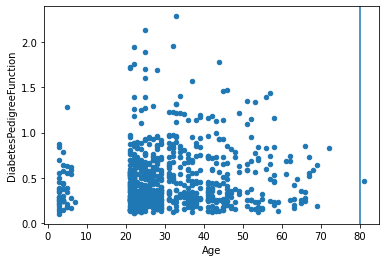

In [39]:
# identifying the outliers in age features with respect to diabetes pedigreefunction
df.plot.scatter(x='Age', y='DiabetesPedigreeFunction').axvline(80)

In [40]:
df.loc[df['Age']>80]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9,134.0,74.0,33.0,6.0,25.9,0.46,81,0


In [41]:
df = df.drop(459)

<AxesSubplot:xlabel='Age', ylabel='DiabetesPedigreeFunction'>

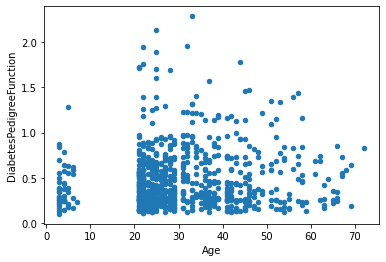

In [42]:
df.plot.scatter(x='Age', y='DiabetesPedigreeFunction')

In [43]:
# Could these set of Age be seen as an outlier?
df.loc[df['Age']< 10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,71.0,33.6,0.627,5,1
5,5,116.0,74.0,27.0,71.0,25.6,0.210,3,0
10,4,11.0,92.0,27.0,71.0,37.6,0.191,3,0
21,8,99.0,84.0,27.0,71.0,35.4,0.388,5,0
30,5,19.0,75.0,26.0,71.0,36.0,0.546,6,0
44,7,159.0,64.0,27.0,71.0,27.4,0.294,4,0
52,5,88.0,66.0,21.0,23.0,24.4,0.342,3,0
93,4,134.0,72.0,27.0,71.0,23.8,0.277,6,1
95,6,144.0,72.0,27.0,228.0,33.9,0.255,4,0
126,3,12.0,7.0,3.0,135.0,42.9,0.452,3,0


<AxesSubplot:ylabel='Density'>

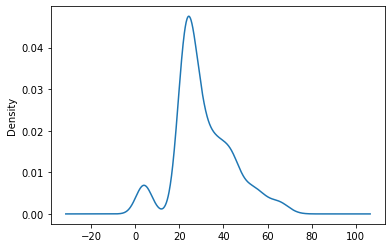

In [43]:
df.Age.plot(kind='density')

In [44]:
df[['SkinThickness','Insulin','Age','DiabetesPedigreeFunction']].describe().T

,count,mean,std,min,25%,50%,75%,max
SkinThickness,763.0,26.043250,10.506689,1.0,22.0000,27.00,32.000,56.000
Insulin,763.0,87.159895,77.528900,1.0,67.0000,71.00,72.500,579.000
Age,763.0,30.855832,13.111682,3.0,23.0000,28.00,38.000,72.000
DiabetesPedigreeFunction,763.0,0.485550,0.333419,0.1,0.2525,0.38,0.647,2.288
